In [23]:
import cv2
import os
from glob import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

image_dir = r'C:\Users\DELL\Desktop\py_project\tianchi_keypoint\train'
blouse_annotation_path = r'C:\Users\DELL\Desktop\py_project\tianchi_keypoint\train\Annotations\annotations.csv'

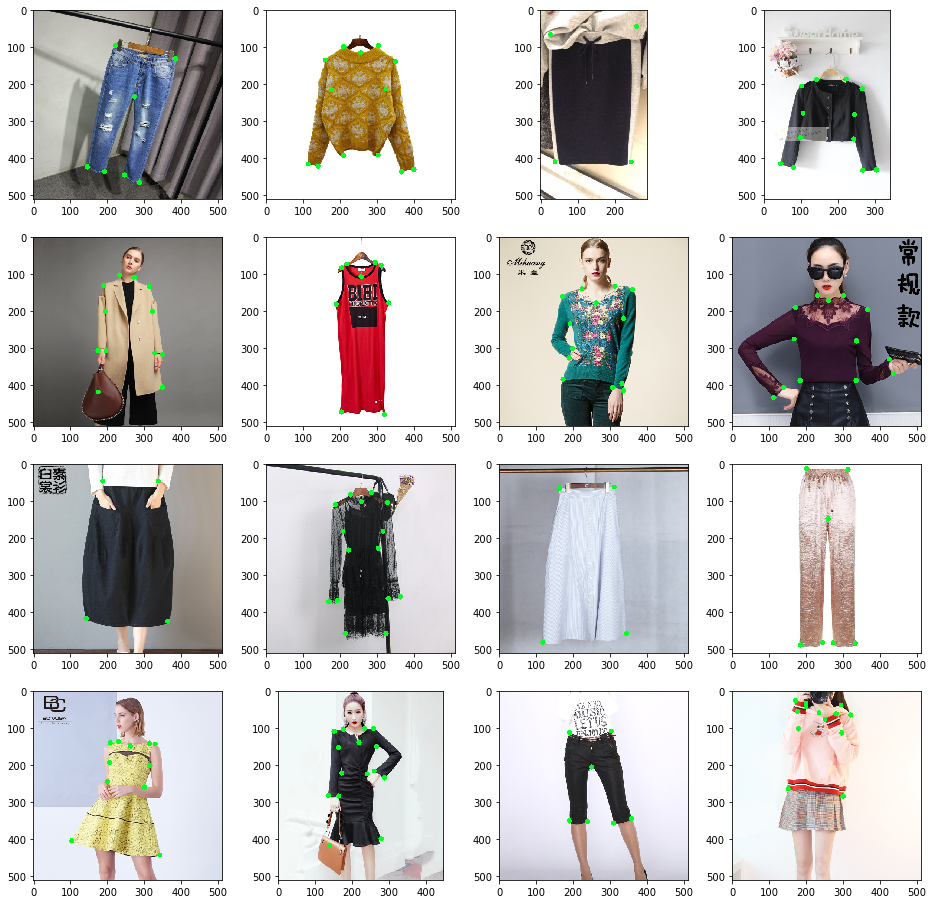

In [108]:
# 读取解析文件
annotation_file = pd.read_csv(blouse_annotation_path)

# 确定可视化数据个数
n = 4 * 4

num_train = len(annotation_file)# 训练数据个数
random_index = np.random.randint(num_train, size = n)# 随机挑选n个数据做可视化
random_index = random_index.tolist()# 将数组转化为列表
annotation_file = annotation_file.iloc[random_index]

subplot_last_param = 1
plt.figure(figsize=(16, 16))# 在循环外设置画布，使sub子图能显示在一个画布上

files_iter = annotation_file.iterrows() # 用df.iterrows() 迭代获取每一行，每一行由(Index, series)元组构成
for index, file_series in files_iter:
    image_relative_id = file_series['image_id'] # 从annotation_file 中获取相对路径
    image_id = os.path.join(image_dir, image_relative_id) # image_id 即图片的绝对路径
    image = cv2.imread(image_id) # 读入图片
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 转换通道 
    
    for index,zuo_biao_dian in zip(file_series.index, file_series.values):
        zuo_biao_dian = zuo_biao_dian.split('_')
        if zuo_biao_dian[-1] == '-1':# 如果坐标描述最后一项是‘-1’，则此坐标点不存在，则不画出此点，否则画出此坐标点
            continue
        elif len(zuo_biao_dian) == 3:
            x = int(zuo_biao_dian[0])
            y = int(zuo_biao_dian[1])
            # print(x, y)
            cv2.circle(image, (x, y), 7, (1,273,36), -1)
            # cv2.circle(image, (x, y), 7, (0,0,0), -1)
        else:
            continue
    

    # print(image.shape)
    num_grid = int(np.sqrt(n))# 画布每行/列多少个网格
    # print(subplot_last_param)
    plt.subplot(num_grid, num_grid, subplot_last_param) 
    subplot_last_param += 1
    plt.imshow(image)

pandas.DataFrame.iterrows

DataFrame.iterrows() 
迭代(iterate)覆盖整个DataFrame的行中，返回(index, Series)对。